<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/baybayin_handwritten_character_dataset_initial_model_build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    392      0 --:--:-- --:--:-- --:--:--   391
Updating fastai...
Done.


In [3]:
!pip install fastcore --upgrade
!pip install fastai2 --upgrade

     |████████████████████████████████| 194kB 2.5MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/My\ Drive/fastai_v4/data/baybayin-handwritten-character-dataset.zip data/.

In [0]:
!unzip data/baybayin-handwritten-character-dataset.zip

In [7]:
# !mv raw data/baybayin-handwritten-character-dataset
# !rm -rf __MACOSX/
# !ls data/*

data/baybayin-handwritten-character-dataset.zip

data/baybayin-handwritten-character-dataset:
a  ba  dara  ei  ga  ha  ka  kuw  la  ma  na  nga  ou  pa  sa  ta  tul	wa  ya


In [0]:
from fastai2.vision.all import *

In [0]:
path = Path('data')/'baybayin-handwritten-character-dataset'

In [3]:
Path.BASE_PATH = path; path.ls()

(#19) [Path('ba'),Path('wa'),Path('nga'),Path('ei'),Path('pa'),Path('ou'),Path('ta'),Path('dara'),Path('kuw'),Path('ya')...]

In [4]:
len(path.ls())

19

In [5]:
vocab = [p.name for p in path.ls()];list(vocab)

['ba',
 'wa',
 'nga',
 'ei',
 'pa',
 'ou',
 'ta',
 'dara',
 'kuw',
 'ya',
 'a',
 'la',
 'ma',
 'ka',
 'ha',
 'sa',
 'na',
 'tul',
 'ga']

In [0]:
dblock = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW),CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(224, ResizeMethod.Squish),
    batch_tfms=[]
)

Setting-up type transforms pipelines
Found 38398 items
2 datasets of sizes 30719,7679
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      data/baybayin-handwritten-character-dataset/ka/ka_02264_file070.jpg
    applying PILBase.create gives
      PILImageBW mode=L size=107x117
  Pipeline: parent_label -> Categorize
    starting from
      data/baybayin-handwritten-character-dataset/ka/ka_02264_file070.jpg
    applying parent_label gives
      ka
    applying Categorize gives
      TensorCategory(6)

Final sample: (PILImageBW mode=L size=107x117, TensorCategory(6))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImageBW mode=L size=107x117, TensorCategory(6))
    applying Resiz

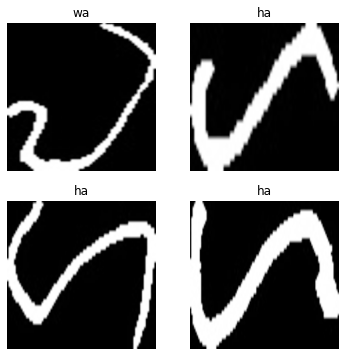

In [7]:
dblock.summary(path,show_batch=true)

In [0]:
dls = dblock.dataloaders(path)

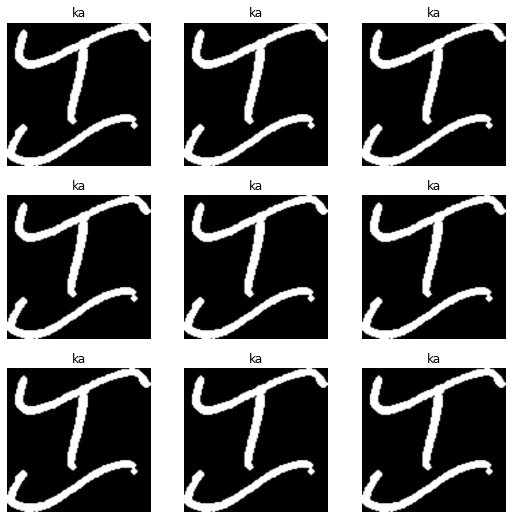

In [9]:
dls.show_batch(unique=True)

In [10]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.214286,0.095222,0.025915,03:39


epoch,train_loss,valid_loss,error_rate,time
0,0.056566,0.049544,0.012111,05:11
1,0.035409,0.030380,0.005730,05:10
2,0.016319,0.017067,0.002865,05:10
3,0.007537,0.016952,0.002605,05:11


In [0]:
learn.save('stage-1')
learn.export('models/baybayin-image-recognizer.pkl')

In [0]:
!mkdir -p /content/drive/My\ Drive/fastai_v4/models/baybayin-handwritten-character-dataset
!cp models/* /content/drive/My\ Drive/fastai_v4/models/baybayin-handwritten-character-dataset/.

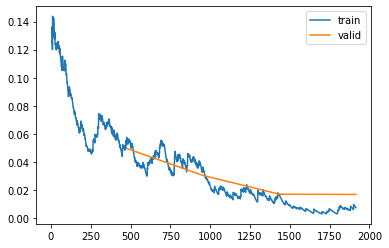

In [14]:
learn.recorder.plot_loss()

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

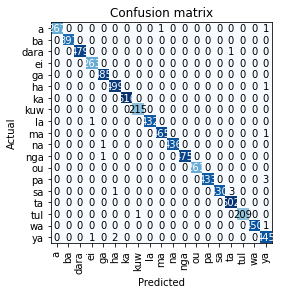

In [16]:
interp.plot_confusion_matrix()

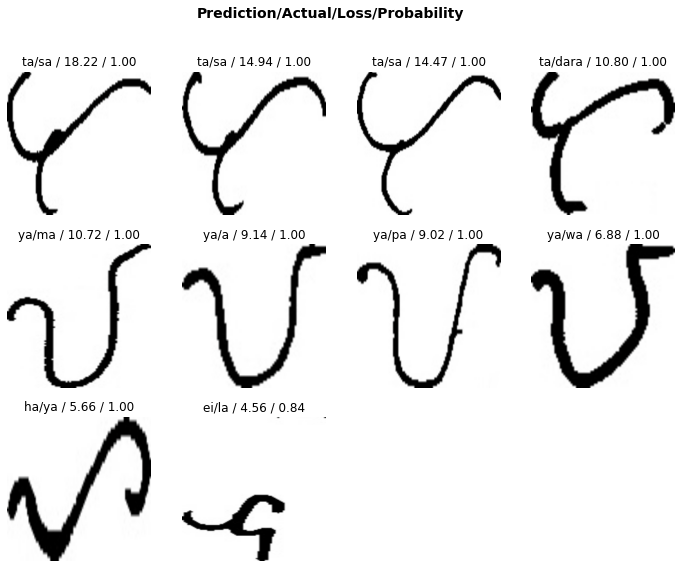

In [17]:
interp.plot_top_losses(10)

In [18]:
interp.most_confused()

[('pa', 'ya', 3),
 ('sa', 'ta', 3),
 ('ya', 'ha', 2),
 ('a', 'ma', 1),
 ('a', 'ya', 1),
 ('dara', 'ta', 1),
 ('ha', 'ya', 1),
 ('la', 'ei', 1),
 ('ma', 'ya', 1),
 ('na', 'ga', 1),
 ('nga', 'ga', 1),
 ('sa', 'ha', 1),
 ('tul', 'kuw', 1),
 ('wa', 'ya', 1),
 ('ya', 'ei', 1)]